In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
expressed_gene_tpm_threshold = -1
minimum_samples_threshold_long = -1
minimum_samples_threshold_circadian = -1

In [3]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [4]:
trimmed_transcriptome = trimmed_transcriptome.loc[
    :, trimmed_transcriptome.sum() > expressed_gene_tpm_threshold
]

trimmed_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.0,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.0,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.0,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.0,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,0.0,1.383813,2.059206,0.0,0.0,27.907884,0.0,11.118408,...,3.486989,4.209645,0.0,1.072920,0.0,0.0,0.948096,0.0,0.000000,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,0.0,1.873955,3.869254,0.0,0.0,40.686812,0.0,7.391606,...,9.640892,4.655562,0.0,5.085306,0.0,0.0,0.360071,0.0,1.758217,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.0,0.000000,2.953706,0.0,0.0,36.084398,0.0,0.000000,...,0.000000,4.975538,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.0,0.901942,4.195848,0.0,0.0,54.077818,0.0,0.334834,...,0.000000,2.304762,0.0,0.000000,0.0,0.0,0.166371,0.0,0.000000,0.694222


In [5]:
long_term_transcriptome = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]
long_term_metadata = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]

In [6]:
trimmed_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,H08,LIC428,plant,c1_t04,2/10/24,8:00,LICCIRC_01,LICRNA_03,2552177.0,438552.0,H,8,5245242.0,Circadian Experiment 1,February,101,2024-02-10 08:00:00
B250508004_n01_LICRNA03_H09,H09,LIC440,plant,c1_t05,2/10/24,12:00,LICCIRC_01,LICRNA_03,4228242.0,493699.0,H,9,7715482.0,Circadian Experiment 1,February,101,2024-02-10 12:00:00
B250508004_n01_LICRNA03_H10,H10,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,LICRNA_03,365095.0,39090.0,H,10,643786.0,Circadian Experiment 1,February,101,2024-02-10 16:00:00


In [7]:
circadian_metadata_1 = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 1")
]
circadian_metadata_2 = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 2")
]

circadian_transcriptome_1 = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 1")
]
circadian_transcriptome_2 = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == ("Circadian Experiment 2")
]

In [8]:
long_term_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.000000,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.000000,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.000000,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.000000,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G04,0.496406,8.356214,0.0,3.372257,3.069350,0.0,0.0,60.177712,0.0,23.758980,...,3.879318,10.115887,0.000000,10.145909,0.0,0.0,0.365112,0.0,0.000000,4.401263
B250508004_n01_LICRNA03_H01,1.365172,7.171230,0.0,1.926502,3.574878,0.0,0.0,53.113875,0.0,40.291678,...,1.185396,6.525640,16.595542,4.923952,0.0,0.0,0.384285,0.0,0.000000,4.448467
B250508004_n01_LICRNA03_H02,3.903593,1.198375,0.0,1.482399,3.897820,0.0,0.0,24.240094,0.0,8.805132,...,91.517576,14.520754,0.000000,2.011375,0.0,0.0,0.000000,0.0,46.732379,2.281997
B250508004_n01_LICRNA03_H03,0.365827,4.913399,0.0,0.972466,3.761743,0.0,0.0,14.311528,0.0,10.334051,...,4.288305,7.558461,0.000000,0.329870,0.0,0.0,0.022423,0.0,0.000000,4.865277


In [9]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G04,G04,LIC367,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,1477644.0,189073.0,G,4,2732871.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_H01,H01,LIC332,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,5963067.0,589822.0,H,1,9338754.0,Long Term,March,134,2024-03-14 08:00:00
B250508004_n01_LICRNA03_H02,H02,LIC344,plant,t24,3/1/24,8:00,LIC_04,LICRNA_03,275002.0,47458.0,H,2,717003.0,Long Term,March,121,2024-03-01 08:00:00


In [10]:
long_term_transcriptome = long_term_transcriptome.sort_index()
long_term_metadata = long_term_metadata.sort_index()

long_term_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.000000,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.000000,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.000000,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.000000,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G04,0.496406,8.356214,0.0,3.372257,3.069350,0.0,0.0,60.177712,0.0,23.758980,...,3.879318,10.115887,0.000000,10.145909,0.0,0.0,0.365112,0.0,0.000000,4.401263
B250508004_n01_LICRNA03_H01,1.365172,7.171230,0.0,1.926502,3.574878,0.0,0.0,53.113875,0.0,40.291678,...,1.185396,6.525640,16.595542,4.923952,0.0,0.0,0.384285,0.0,0.000000,4.448467
B250508004_n01_LICRNA03_H02,3.903593,1.198375,0.0,1.482399,3.897820,0.0,0.0,24.240094,0.0,8.805132,...,91.517576,14.520754,0.000000,2.011375,0.0,0.0,0.000000,0.0,46.732379,2.281997
B250508004_n01_LICRNA03_H03,0.365827,4.913399,0.0,0.972466,3.761743,0.0,0.0,14.311528,0.0,10.334051,...,4.288305,7.558461,0.000000,0.329870,0.0,0.0,0.022423,0.0,0.000000,4.865277


In [11]:
microbiome_abundance = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv"
)
merged_microbiome = microbiome_abundance.merge(
    metadata[["sampID", "Experiment Type"]], left_on="plantID", right_on="sampID"
)
long_term_microbiome = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Long Term"
]
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
5,LIC016,plant,t02,11/7/23,8:00,LIC_01,6,LIC016,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,54.4,LIC016,Long Term
9,LIC051,plant,t05,11/21/23,8:00,LIC_01,20,LIC051,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,49.7,LIC051,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,LIC157,plant,t14,1/23/24,8:00,LIC_02,83,LIC157,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella luteola,0.5,LIC157,Long Term
12280,LIC195,plant,t17,2/2/24,8:00,LIC_03,93,LIC195,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella flava,0.5,LIC195,Long Term
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term


In [12]:
circadian_microbiome_1 = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Circadian Experiment 1"
]

circadian_microbiome_1 = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Circadian Experiment 1"
]

In [13]:
merged_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
0,LIC522,plant,c1_t11,2/11/24,12:00,LICCIRC_02,102,LIC522,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 viridiflava,79.1,LIC522,Circadian Experiment 1
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
3,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,101,LIC452,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Massilia_574544,Massilia atriviolacea,59.8,LIC452,Circadian Experiment 1
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term
12283,LIC631,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC631,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas subvibrioides,0.5,LIC631,Circadian Experiment 2
12284,LIC629,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC629,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Agrobacterium,Agrobacterium larrymoorei,0.5,LIC629,Circadian Experiment 2


In [14]:
genus_sum = (
    long_term_microbiome[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
)
genus_sum = genus_sum.reset_index()

genus_sum_w_tp = genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
5098,LIC368,Pseudoduganella_570666,0.5,LIC368,t08
5099,LIC368,Pseudomonas_E_647464,2.6,LIC368,t08
5100,LIC368,Rhodoferax_C,6.6,LIC368,t08
5101,LIC368,Sphingomonas_L_486704,19.7,LIC368,t08


In [15]:
genus_sum.set_index(
    "Sample",
    drop=True,
).index.difference(
    genus_sum_w_tp.set_index("Sample", drop=True).index
)  ## Difference is from the dropped samples (due to low quality RNA) which we dont' wanna drop here cause its DNA

Index([], dtype='object', name='Sample')

In [16]:
genus_sum_w_tp.head(40)

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
5,LIC001,Chryseobacterium_A_796612,0.6,LIC001,t01
6,LIC001,Curtobacterium,1.0,LIC001,t01
7,LIC001,Dactylopiibacterium,0.7,LIC001,t01
8,LIC001,Flavobacterium,0.8,LIC001,t01
9,LIC001,Friedmanniella,2.7,LIC001,t01


In [17]:
all_present_genus = genus_sum_w_tp["Genus"].unique()
all_present_genus

array(['Actinomycetospora', 'Actinoplanes', 'Aeromicrobium',
       'Blastococcus', 'Caulobacter_487784', 'Chryseobacterium_A_796612',
       'Curtobacterium', 'Dactylopiibacterium', 'Flavobacterium',
       'Friedmanniella', 'Frigoribacterium', 'Geodermatophilus',
       'Herbaspirillum', 'Hylemonella', 'Kineococcus', 'Kineosporia',
       'Klenkia', 'Kordiimonas', 'Massilia_574544', 'Methylobacterium',
       'Methylophilus', 'Microbacterium_A_383321', 'Nakamurella',
       'Neorhizobium_500197', 'Nocardioides_A_392796',
       'Pseudoduganella_570666', 'Pseudomonas_B_650453',
       'Pseudomonas_E_647464', 'Pseudomonas_E_647626', 'Rhodoferax_C',
       'Solirubrobacter', 'Sphingomonas_L_486704', 'Telluria_573210',
       'Variovorax', 'Arthrobacter_E_385446', 'Arthrobacter_E_385777',
       'Caballeronia', 'Marmoricola_A_392027', 'Massilia_574424',
       'Microlunatus_B', 'Nocardioides_A_392805',
       'Noviherbaspirillum_A_568106', 'Paucimonas', 'Pedococcus',
       'Pseudodugane

In [18]:
## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp["sampID"].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_present_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    genus_sum_w_tp = pd.concat([genus_sum_w_tp, empty_df_to_add])

In [19]:
timepoint_average_abundance = (
    genus_sum_w_tp[["Genus", "timepoint", "AbundR100"]]
    .groupby(["Genus", "timepoint"])
    .mean()
)
timepoint_average_abundance = timepoint_average_abundance.reset_index()
timepoint_average_abundance

,Genus,timepoint,AbundR100
0,Abditibacterium,t01,0.0
1,Abditibacterium,t02,0.0
2,Abditibacterium,t03,0.0
3,Abditibacterium,t04,0.0
4,Abditibacterium,t05,0.0
...,...,...,...
3831,Xenophilus_587940,t24,0.0
3832,Xenophilus_587940,t25,0.0
3833,Xenophilus_587940,t26,0.0
3834,Xenophilus_587940,t27,0.0


In [20]:
# Check structure of the key dataframes
print("long_term_metadata columns:", long_term_metadata.columns.tolist())
print(
    "long_term_metadata timepoint unique values:",
    sorted(long_term_metadata["timepoint"].unique()),
)
print(
    "\ntimepoint_average_abundance columns:",
    timepoint_average_abundance.columns.tolist(),
)
print(
    "timepoint_average_abundance timepoint unique values:",
    sorted(timepoint_average_abundance["timepoint"].unique()),
)

long_term_metadata columns: ['plate.pos', 'sampID', 'sample.type', 'timepoint', 'date', 'time', 'extractplate', 'rnaprepplate', 'Unmapped', 'No Feature', 'plate_row', 'plate_col', 'Total Reads', 'Experiment Type', 'Sample Month', 'daysincestart', 'Date and Time']
long_term_metadata timepoint unique values: ['t01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28']

timepoint_average_abundance columns: ['Genus', 'timepoint', 'AbundR100']
timepoint_average_abundance timepoint unique values: ['t01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28']


In [21]:
# First, let's aggregate transcriptome data by timepoint (averaging across samples)
long_term_transcriptome_w_tp = long_term_transcriptome.copy()
long_term_transcriptome_w_tp["timepoint"] = long_term_metadata["timepoint"]

# Average gene expression by timepoint
transcriptome_by_timepoint = long_term_transcriptome_w_tp.groupby("timepoint").mean()
transcriptome_by_timepoint

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,0.000000,2.605825,4.439901,0.0,0.000000,50.977363,0.0,13.004802,...,6.651848,21.939469,0.000000,0.161073,0.000000,0.0,0.267902,0.0,0.000000,0.965547
t02,0.940355,7.298013,0.000000,3.842908,4.463269,0.0,5.166150,25.168823,0.0,47.655766,...,0.244885,21.553952,3.428396,0.037675,0.000000,0.0,0.238550,0.0,0.000000,1.325997
t03,1.783955,7.880381,0.000000,4.144576,4.227300,0.0,0.000000,46.778572,0.0,28.141387,...,1.035596,6.500587,0.000000,2.156090,0.000000,0.0,0.197246,0.0,0.000000,0.972086
t04,3.294595,7.674816,0.000000,5.922081,5.006461,0.0,0.000000,28.959007,0.0,39.972919,...,3.078758,19.860159,4.717444,4.191593,0.000000,0.0,0.176193,0.0,0.000000,2.531536
t05,1.695050,6.069584,0.000000,2.895225,3.362750,0.0,0.000000,40.021234,0.0,10.213291,...,3.691827,10.404960,8.562370,1.142433,0.000000,0.0,0.176383,0.0,0.000000,1.769217
t06,0.817885,5.963264,0.000000,2.836390,2.420270,0.0,0.000000,34.425932,0.0,8.355582,...,7.357152,5.552243,1.294320,3.633794,0.000000,0.0,0.327666,0.0,0.000000,1.578309
t07,1.108656,6.329721,0.000000,1.828056,3.699847,0.0,0.000000,47.950309,0.0,6.811390,...,4.843796,7.371363,1.893213,3.312303,0.000000,0.0,0.351533,0.0,0.471103,2.210424
t08,0.432387,4.034252,0.000000,1.315234,2.412136,0.0,0.000000,37.309378,0.0,12.520038,...,7.631265,6.334308,3.134487,4.265254,0.000000,0.0,0.406276,0.0,0.000000,2.934250
t09,0.892427,6.731354,0.000000,1.876925,2.804225,0.0,0.660741,38.215024,0.0,4.794368,...,10.159008,6.338279,2.003623,2.928722,0.000000,0.0,0.324891,0.0,0.000000,1.937635


In [22]:
# Get sorted unique timepoints
timepoints = sorted(transcriptome_by_timepoint.index.unique())
print(f"Available timepoints: {timepoints}")
print(f"Number of timepoints: {len(timepoints)}")

Available timepoints: ['t01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28']
Number of timepoints: 28


In [23]:
# Create shifted transcriptome dataframes
# Shift forward: transcriptome at t correlates with microbiome at t+1 (transcriptome leads)
# Shift backward: transcriptome at t correlates with microbiome at t-1 (microbiome leads)

# Create a mapping from original timepoint to shifted timepoint
tp_to_idx = {tp: i for i, tp in enumerate(timepoints)}
idx_to_tp = {i: tp for i, tp in enumerate(timepoints)}

# Shift forward (+1): transcriptome data moved to next timepoint
# This tests: does expression at time t correlate with microbiome at time t+1?
transcriptome_shifted_forward = transcriptome_by_timepoint.copy()
transcriptome_shifted_forward.index = [
    idx_to_tp.get(tp_to_idx[tp] + 1, None) for tp in transcriptome_shifted_forward.index
]
transcriptome_shifted_forward = transcriptome_shifted_forward.dropna(subset=[])
transcriptome_shifted_forward = transcriptome_shifted_forward[
    transcriptome_shifted_forward.index.notna()
]

# Shift backward (-1): transcriptome data moved to previous timepoint
# This tests: does expression at time t correlate with microbiome at time t-1?
transcriptome_shifted_backward = transcriptome_by_timepoint.copy()
transcriptome_shifted_backward.index = [
    idx_to_tp.get(tp_to_idx[tp] - 1, None)
    for tp in transcriptome_shifted_backward.index
]
transcriptome_shifted_backward = transcriptome_shifted_backward[
    transcriptome_shifted_backward.index.notna()
]

print(f"Original transcriptome timepoints: {list(transcriptome_by_timepoint.index)}")
print(f"Forward shifted timepoints: {list(transcriptome_shifted_forward.index)}")
print(f"Backward shifted timepoints: {list(transcriptome_shifted_backward.index)}")

Original transcriptome timepoints: ['t01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28']
Forward shifted timepoints: ['t02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28']
Backward shifted timepoints: ['t01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27']


In [24]:
# Pivot microbiome data to have timepoints as rows and genus as columns
microbiome_by_timepoint = timepoint_average_abundance.pivot(
    index="timepoint", columns="Genus", values="AbundR100"
)
microbiome_by_timepoint = microbiome_by_timepoint.sort_index()
microbiome_by_timepoint

Genus,Abditibacterium,Actinoallomurus,Actinocorallia,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agreia,Agrobacterium,Agrococcus,...,Telluria_573210,Terracoccus,UBA1952,UBA4416,UBA5216,Umezawaea,Variovorax,Virgisporangium,Williamsia_A,Xenophilus_587940
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.000000,0.000,0.0000,0.375000,0.137500,0.7875,0.000000,0.0000,0.000000,0.0000,...,1.675000,0.0000,0.0000,0.0000,0.0000,0.0000,2.362500,0.0000,0.0000,0.000
t02,0.000000,0.000,0.0625,0.587500,0.712500,0.3125,0.000000,0.0000,0.250000,0.0000,...,3.075000,0.0000,0.0000,0.0000,0.0000,0.0000,0.737500,0.0000,0.0000,0.000
t03,0.000000,0.000,0.0625,0.600000,0.450000,0.1500,0.000000,0.0000,0.350000,0.0000,...,1.425000,2.6500,0.0000,0.0000,0.0000,0.0000,1.800000,0.0000,0.0875,0.000
t04,0.000000,0.000,0.0000,0.300000,0.000000,0.1625,0.000000,0.0000,0.387500,0.0000,...,0.912500,0.0000,0.0000,0.0000,0.0625,0.0000,0.950000,0.0000,0.0000,0.000
t05,0.000000,0.075,0.0000,0.337500,0.575000,0.0000,0.000000,0.0000,0.600000,0.1625,...,0.837500,0.0000,0.0000,0.0000,0.0000,0.0000,0.637500,0.0000,0.0000,0.000
t06,0.000000,0.000,0.0000,0.775000,1.262500,0.6125,0.062500,0.0000,0.175000,0.0000,...,0.775000,0.0000,0.0000,0.0000,0.0000,0.0000,2.612500,0.2375,0.0000,0.000
t07,0.000000,0.000,0.0000,0.362500,0.287500,0.0000,0.000000,0.0000,0.212500,0.0000,...,4.862500,0.0000,0.0625,0.0000,0.0000,0.0000,0.875000,0.0000,0.0000,0.000
t08,0.000000,0.000,0.0000,0.725000,0.312500,0.0625,0.000000,0.0000,0.125000,0.0000,...,0.700000,0.0000,0.0000,0.0000,0.0000,0.0000,2.012500,0.0000,0.0000,0.000
t09,0.000000,0.000,0.0000,0.212500,0.062500,0.1375,0.000000,0.0000,0.487500,0.0000,...,1.500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.975000,0.0000,0.0000,0.000


In [25]:
microbiome_by_timepoint = microbiome_by_timepoint.loc[
    :, (microbiome_by_timepoint > 0).sum() > minimum_samples_threshold_long
]

In [26]:
def calculate_gene_genus_correlations(transcriptome_df, microbiome_df):
    """
    Calculate correlations between all genes and all genera across shared timepoints.
    Returns a DataFrame with genes as rows and genera as columns.
    Uses vectorized Spearman correlation via pandas for speed.
    """
    from scipy.stats import spearmanr

    # Find shared timepoints
    shared_timepoints = transcriptome_df.index.intersection(microbiome_df.index)

    # Subset to shared timepoints
    trans_subset = transcriptome_df.loc[shared_timepoints]
    micro_subset = microbiome_df.loc[shared_timepoints]

    print(f"Calculating correlations across {len(shared_timepoints)} shared timepoints")

    # Vectorized approach: compute all correlations at once using scipy's spearmanr
    # spearmanr can take two 2D arrays and return correlation matrix between all columns
    trans_values = trans_subset.values  # shape: (n_timepoints, n_genes)
    micro_values = micro_subset.values  # shape: (n_timepoints, n_genera)

    # Concatenate and compute full correlation matrix, then extract the cross-correlation block
    combined = np.hstack([trans_values, micro_values])
    n_genes = trans_values.shape[1]
    n_genera = micro_values.shape[1]

    # spearmanr returns correlation matrix and p-value matrix
    corr_full, pval_full = spearmanr(combined, axis=0)

    # Extract the cross-correlation block (genes x genera)
    correlation_matrix = pd.DataFrame(
        corr_full[:n_genes, n_genes:],
        index=trans_subset.columns,
        columns=micro_subset.columns,
    )
    pvalue_matrix = pd.DataFrame(
        pval_full[:n_genes, n_genes:],
        index=trans_subset.columns,
        columns=micro_subset.columns,
    )

    return correlation_matrix, pvalue_matrix, shared_timepoints

In [27]:
# Calculate correlations for all three scenarios
print("=== No shift (synchronous) ===")
corr_no_shift, pval_no_shift, tp_no_shift = calculate_gene_genus_correlations(
    transcriptome_by_timepoint, microbiome_by_timepoint
)

print("\n=== Forward shift (transcriptome leads microbiome by 1 timepoint) ===")
corr_forward, pval_forward, tp_forward = calculate_gene_genus_correlations(
    transcriptome_shifted_forward, microbiome_by_timepoint
)

print("\n=== Backward shift (microbiome leads transcriptome by 1 timepoint) ===")
corr_backward, pval_backward, tp_backward = calculate_gene_genus_correlations(
    transcriptome_shifted_backward, microbiome_by_timepoint
)

=== No shift (synchronous) ===
Calculating correlations across 28 shared timepoints


/Users/michael/miniconda3/envs/Luke_terrace/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/michael/miniconda3/envs/Luke_terrace/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



=== Forward shift (transcriptome leads microbiome by 1 timepoint) ===
Calculating correlations across 27 shared timepoints

=== Backward shift (microbiome leads transcriptome by 1 timepoint) ===
Calculating correlations across 27 shared timepoints


In [38]:
import pickle
import os

# # Create output directory if it doesn't exist
output_dir = "/Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/Time_shifted_correlation"
os.makedirs(output_dir, exist_ok=True)

# # Save no shift correlations
# dbfile = open(f"{output_dir}/corr_no_shift_remove_low_exp.p", "ab")
# pickle.dump(corr_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir}/pval_no_shift_remove_low_exp.p", "ab")
# pickle.dump(pval_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir}/tp_no_shift_remove_low_exp.p", "ab")
# pickle.dump(tp_no_shift, dbfile)
# dbfile.close()

# # Save forward shift correlations
# dbfile = open(f"{output_dir}/corr_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(corr_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir}/pval_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(pval_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir}/tp_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(tp_forward, dbfile)
# dbfile.close()

# # Save backward shift correlations
# dbfile = open(f"{output_dir}/corr_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(corr_backward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir}/pval_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(pval_backward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir}/tp_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(tp_backward, dbfile)
# dbfile.close()

# print(f"Saved all correlation results to {output_dir}")

# Read no shift correlations
dbfile = open(f"{output_dir}/corr_no_shift.p", "rb")
corr_no_shift = pickle.load(dbfile)
dbfile.close()

dbfile = open(f"{output_dir}/pval_no_shift.p", "rb")
pval_no_shift = pickle.load(dbfile)
dbfile.close()

dbfile = open(f"{output_dir}/tp_no_shift.p", "rb")
tp_no_shift = pickle.load(dbfile)
dbfile.close()

# Read forward shift correlations
dbfile = open(f"{output_dir}/corr_forward_shift.p", "rb")
corr_forward = pickle.load(dbfile)
dbfile.close()

dbfile = open(f"{output_dir}/pval_forward_shift.p", "rb")
pval_forward = pickle.load(dbfile)
dbfile.close()

dbfile = open(f"{output_dir}/tp_forward_shift.p", "rb")
tp_forward = pickle.load(dbfile)
dbfile.close()

# Read backward shift correlations
dbfile = open(f"{output_dir}/corr_backward_shift.p", "rb")
corr_backward = pickle.load(dbfile)
dbfile.close()

dbfile = open(f"{output_dir}/pval_backward_shift.p", "rb")
pval_backward = pickle.load(dbfile)
dbfile.close()

dbfile = open(f"{output_dir}/tp_backward_shift.p", "rb")
tp_backward = pickle.load(dbfile)
dbfile.close()

print(f"Loaded all correlation results from {output_dir}")

Loaded all correlation results from /Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/Time_shifted_correlation


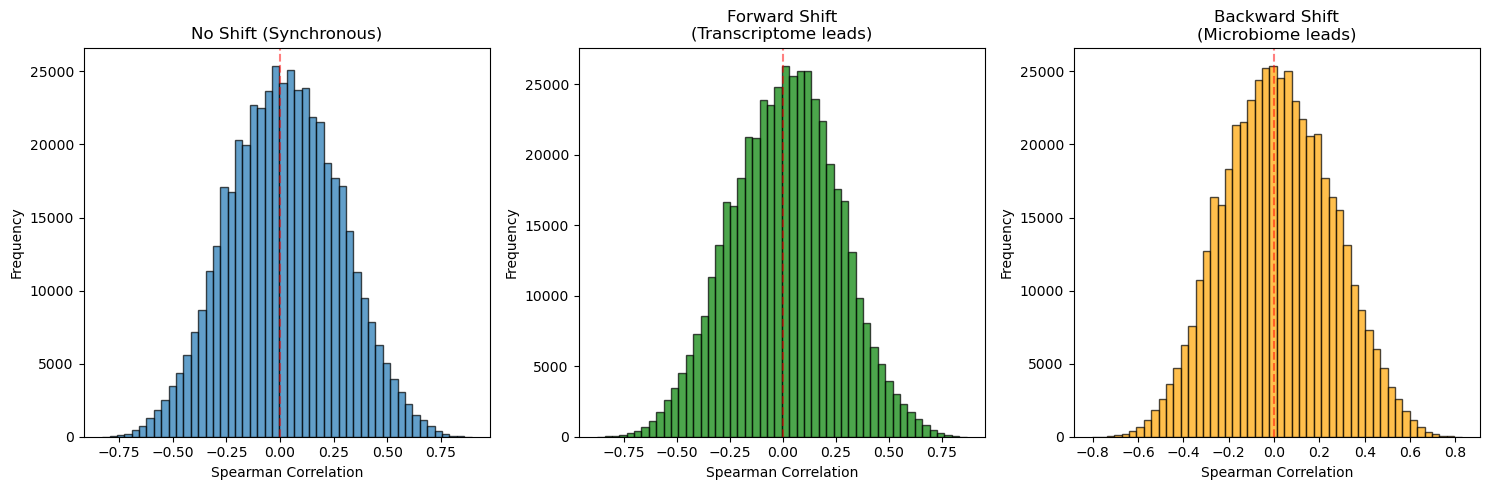

No shift - Mean abs correlation: 0.2083
Forward shift - Mean abs correlation: 0.2029
Backward shift - Mean abs correlation: 0.1945


In [39]:
# Compare correlation distributions across shifts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Flatten correlation matrices for distribution plots
corr_no_shift_flat = corr_no_shift.values.flatten()
corr_forward_flat = corr_forward.values.flatten()
corr_backward_flat = corr_backward.values.flatten()

# Remove NaN values
corr_no_shift_flat = corr_no_shift_flat[~np.isnan(corr_no_shift_flat)]
corr_forward_flat = corr_forward_flat[~np.isnan(corr_forward_flat)]
corr_backward_flat = corr_backward_flat[~np.isnan(corr_backward_flat)]

axes[0].hist(corr_no_shift_flat, bins=50, alpha=0.7, edgecolor="black")
axes[0].set_title("No Shift (Synchronous)")
axes[0].set_xlabel("Spearman Correlation")
axes[0].set_ylabel("Frequency")
axes[0].axvline(x=0, color="red", linestyle="--", alpha=0.5)

axes[1].hist(corr_forward_flat, bins=50, alpha=0.7, edgecolor="black", color="green")
axes[1].set_title("Forward Shift\n(Transcriptome leads)")
axes[1].set_xlabel("Spearman Correlation")
axes[1].set_ylabel("Frequency")
axes[1].axvline(x=0, color="red", linestyle="--", alpha=0.5)

axes[2].hist(corr_backward_flat, bins=50, alpha=0.7, edgecolor="black", color="orange")
axes[2].set_title("Backward Shift\n(Microbiome leads)")
axes[2].set_xlabel("Spearman Correlation")
axes[2].set_ylabel("Frequency")
axes[2].axvline(x=0, color="red", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"No shift - Mean abs correlation: {np.mean(np.abs(corr_no_shift_flat)):.4f}")
print(f"Forward shift - Mean abs correlation: {np.mean(np.abs(corr_forward_flat)):.4f}")
print(
    f"Backward shift - Mean abs correlation: {np.mean(np.abs(corr_backward_flat)):.4f}"
)

In [40]:
# Find genes with strongest delayed correlations
# Compare: which genes have better correlations with shifted vs non-shifted data?


def find_best_shift_correlations(
    corr_no_shift, corr_forward, corr_backward, pval_threshold=0.05
):
    """
    For each gene-genus pair, find which shift gives the strongest correlation.
    """
    results = []

    for gene in corr_no_shift.index:
        for genus in corr_no_shift.columns:
            r_sync = corr_no_shift.loc[gene, genus]
            r_fwd = (
                corr_forward.loc[gene, genus] if gene in corr_forward.index else np.nan
            )
            r_bwd = (
                corr_backward.loc[gene, genus]
                if gene in corr_backward.index
                else np.nan
            )

            # Find the shift with max absolute correlation
            correlations = {"sync": r_sync, "forward": r_fwd, "backward": r_bwd}
            valid_corrs = {k: v for k, v in correlations.items() if not np.isnan(v)}

            if valid_corrs:
                best_shift = max(valid_corrs.keys(), key=lambda k: abs(valid_corrs[k]))
                best_corr = valid_corrs[best_shift]

                results.append(
                    {
                        "gene": gene,
                        "genus": genus,
                        "best_shift": best_shift,
                        "best_correlation": best_corr,
                        "sync_correlation": r_sync,
                        "forward_correlation": r_fwd,
                        "backward_correlation": r_bwd,
                    }
                )

    return pd.DataFrame(results)


shift_comparison = find_best_shift_correlations(
    corr_no_shift, corr_forward, corr_backward
)
shift_comparison

,gene,genus,best_shift,best_correlation,sync_correlation,forward_correlation,backward_correlation
0,AT1G01010,Aureimonas_A_501549,forward,0.262120,-0.181769,0.262120,-0.039762
1,AT1G01010,Blastococcus,forward,0.338394,0.258208,0.338394,0.074790
2,AT1G01010,Flavobacterium,forward,-0.365079,-0.229338,-0.365079,-0.011600
3,AT1G01010,Friedmanniella,forward,0.458572,0.251477,0.458572,0.046868
4,AT1G01010,Frigoribacterium,sync,0.324073,0.324073,0.209434,-0.178293
...,...,...,...,...,...,...,...
490190,ArthCp085,Pseudomonas_E_647464,forward,-0.211233,0.131910,-0.211233,0.159341
490191,ArthCp085,Rhodoferax_C,backward,0.410256,0.071702,0.173993,0.410256
490192,ArthCp085,Sphingomonas_L_486704,forward,-0.219814,-0.006295,-0.219814,0.153564
490193,ArthCp085,Telluria_573210,sync,-0.245518,-0.245518,-0.143795,0.054953


Best shift distribution across all gene-genus pairs:
best_shift
forward     170448
sync        163090
backward    156657
Name: count, dtype: int64

Total pairs analyzed: 490195


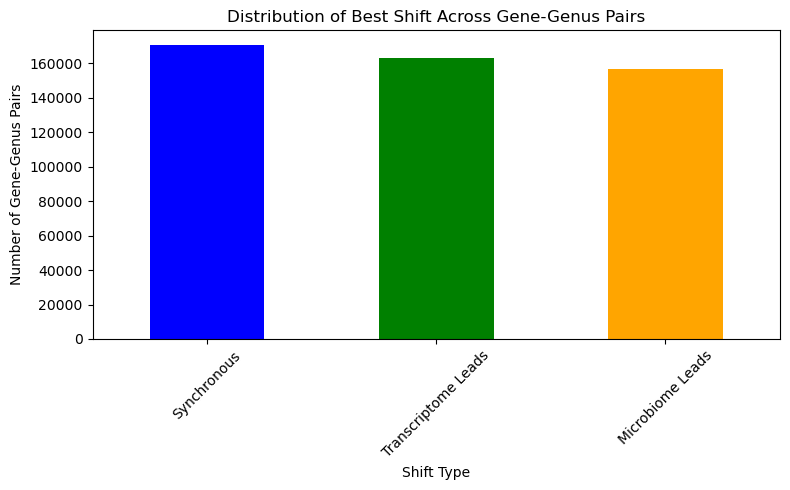

In [41]:
# Summary: count how many gene-genus pairs have each shift as their best
shift_counts = shift_comparison["best_shift"].value_counts()
print("Best shift distribution across all gene-genus pairs:")
print(shift_counts)
print(f"\nTotal pairs analyzed: {len(shift_comparison)}")

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
shift_counts.plot(kind="bar", ax=ax, color=["blue", "green", "orange"])
ax.set_title("Distribution of Best Shift Across Gene-Genus Pairs")
ax.set_xlabel("Shift Type")
ax.set_ylabel("Number of Gene-Genus Pairs")
ax.set_xticklabels(
    ["Synchronous", "Transcriptome Leads", "Microbiome Leads"], rotation=45
)
plt.tight_layout()
plt.show()

In [42]:
# Show top genes with strongest delayed correlations (forward or backward shift better than sync)
# Filter for pairs where shifted correlation is notably stronger

shift_comparison["improvement_forward"] = (
    shift_comparison["forward_correlation"].abs()
    - shift_comparison["sync_correlation"].abs()
)
shift_comparison["improvement_backward"] = (
    shift_comparison["backward_correlation"].abs()
    - shift_comparison["sync_correlation"].abs()
)

# Top genes where transcriptome leads (forward shift is better)
top_forward = shift_comparison.nlargest(20, "improvement_forward")[
    ["gene", "genus", "sync_correlation", "forward_correlation", "improvement_forward"]
]
print(
    "Top 20 gene-genus pairs where transcriptome LEADS microbiome (forward shift better):"
)
display(top_forward)

# Top genes where microbiome leads (backward shift is better)
top_backward = shift_comparison.nlargest(20, "improvement_backward")[
    [
        "gene",
        "genus",
        "sync_correlation",
        "backward_correlation",
        "improvement_backward",
    ]
]
print(
    "\nTop 20 gene-genus pairs where microbiome LEADS transcriptome (backward shift better):"
)
display(top_backward)

Top 20 gene-genus pairs where transcriptome LEADS microbiome (forward shift better):


,gene,genus,sync_correlation,forward_correlation,improvement_forward
180697,AT2G35730,Frigoribacterium,0.143444,-0.818931,0.675488
333332,AT4G18050,Rhodoferax_C,0.001095,-0.675824,0.674729
252739,AT3G25260,Aureimonas_A_501549,-0.002178,0.649797,0.647619
464473,AT5G56540,Variovorax,0.026820,-0.673993,0.647173
464429,AT5G56520,Klenkia,-0.020799,-0.666056,0.645257
203180,AT2G46950,Rhodoferax_C,0.018244,-0.656113,0.637870
348534,AT4G26095,Aureimonas_A_501549,0.031254,0.665547,0.634292
309362,AT4G04615,Rhodoferax_C,0.003284,-0.635531,0.632247
451856,AT5G49550,Rhodoferax_C,-0.039956,-0.669109,0.629152
66826,AT1G46552,Variovorax,-0.117132,-0.745421,0.628289



Top 20 gene-genus pairs where microbiome LEADS transcriptome (backward shift better):


,gene,genus,sync_correlation,backward_correlation,improvement_backward
348124,AT4G25870,Telluria_573210,0.001095,0.774233,0.773138
20653,AT1G11303,Telluria_573210,-0.035582,0.777591,0.742009
57203,AT1G06463,Telluria_573210,-0.033940,0.775454,0.741514
339318,AT4G21445,Telluria_573210,0.020528,0.745840,0.725312
331236,AT4G16980,Massilia_574544,0.012591,-0.723554,0.710963
455955,AT5G51950,Telluria_573210,0.010129,-0.698626,0.688497
425965,AT5G34795,Rhodoferax_C,0.009265,0.681212,0.671947
106078,AT1G70410,Telluria_573210,-0.006569,0.663105,0.656536
481146,AT5G09365,Pseudomonas_E_647464,0.053787,-0.710181,0.656394
133898,AT2G05280,Klenkia,0.006704,0.659426,0.652722


In [33]:
shift_comparison.loc[shift_comparison["genus"] == "Sphingomonas_L_486704"].sort_values(
    by="improvement_forward", ascending=False
).head(30)

,gene,genus,best_shift,best_correlation,sync_correlation,forward_correlation,backward_correlation,improvement_forward,improvement_backward
3910651,AT5G09855,Sphingomonas_L_486704,forward,-0.419499,0.002248,-0.419499,0.083954,0.417251,0.081706
2640250,AT4G15300,Sphingomonas_L_486704,forward,-0.539574,-0.128435,-0.539574,-0.055633,0.411139,-0.072802
2719436,AT4G20240,Sphingomonas_L_486704,forward,-0.448247,0.046267,-0.448247,0.170666,0.401980,0.124399
3370871,AT5G24800,Sphingomonas_L_486704,forward,-0.403908,0.007116,-0.403908,-0.006411,0.396791,-0.000705
3798037,AT5G60180,Sphingomonas_L_486704,forward,-0.452884,0.059003,-0.452884,0.002938,0.393881,-0.056065
2446121,AT4G00720,Sphingomonas_L_486704,forward,-0.455808,-0.063227,-0.455808,-0.042742,0.392581,-0.020485
920078,AT1G74620,Sphingomonas_L_486704,forward,0.472977,0.080482,0.472977,0.095725,0.392495,0.015243
3277848,AT5G18090,Sphingomonas_L_486704,forward,-0.657706,-0.265370,-0.657706,-0.124637,0.392335,-0.140733
500036,AT1G35255,Sphingomonas_L_486704,forward,0.442901,0.054772,0.442901,0.123721,0.388129,0.068949
2092250,AT3G28770,Sphingomonas_L_486704,forward,0.419267,0.031989,0.419267,0.137049,0.387278,0.105060


In [34]:
sphingo_only = shift_comparison.loc[
    shift_comparison["genus"] == "Sphingomonas_L_486704"
]

In [35]:
sphingo_only[
    [
        "sync_correlation",
        "forward_correlation",
        "backward_correlation",
        "improvement_forward",
        "improvement_backward",
    ]
].mean()

sync_correlation       -0.003734
forward_correlation    -0.033696
backward_correlation    0.020420
improvement_forward    -0.012495
improvement_backward    0.013596
dtype: float64

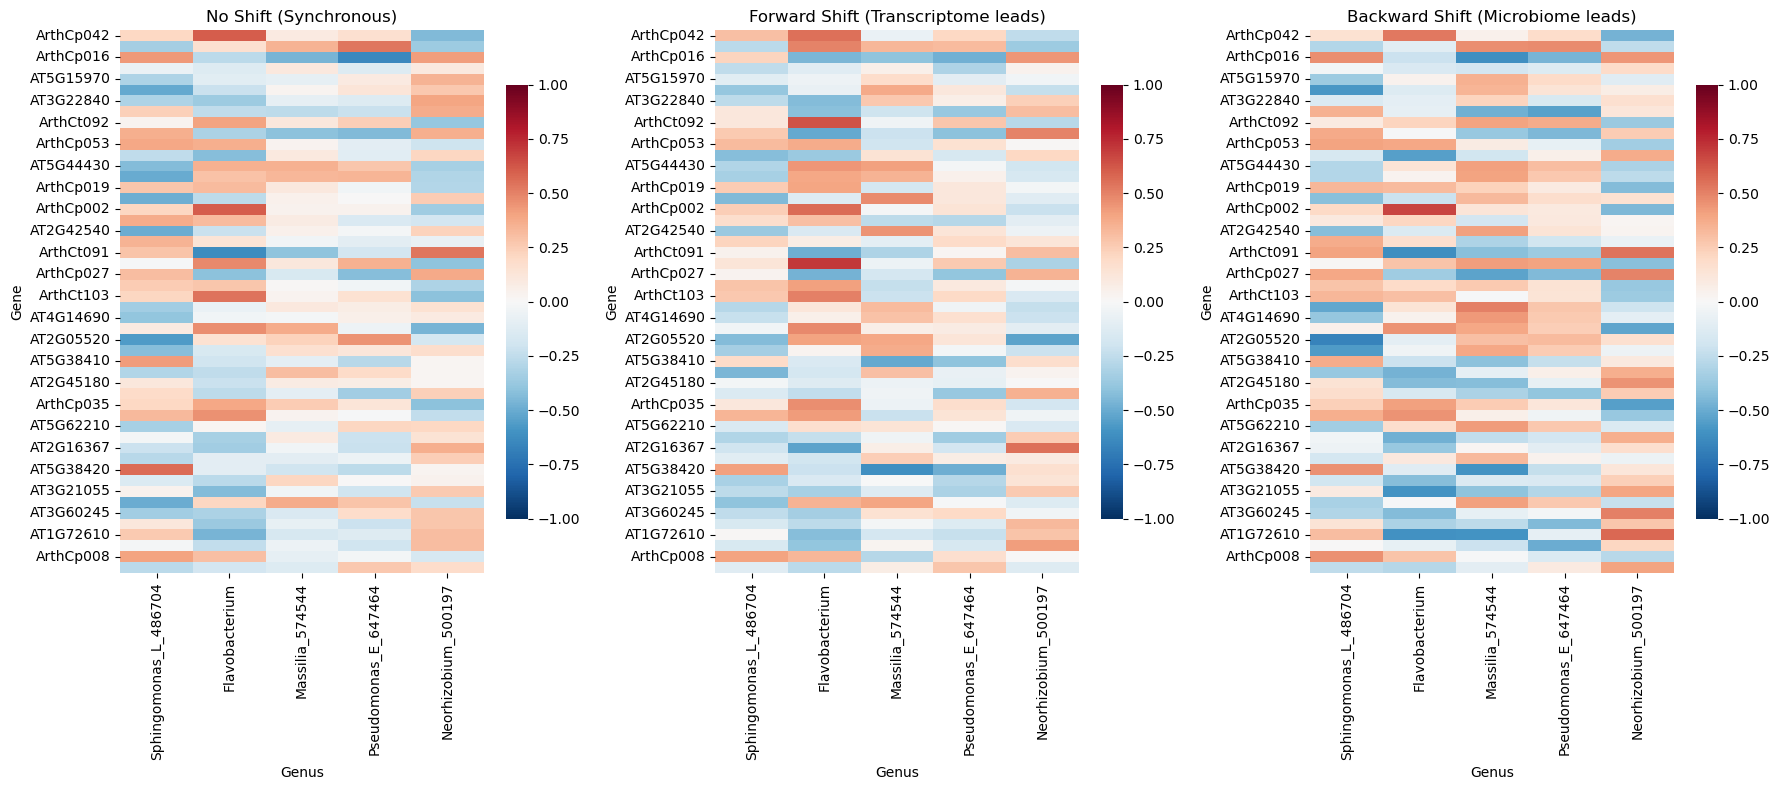

In [36]:
# Heatmap comparison for a selected genus showing correlations across shifts
# Select a few genera with interesting patterns
top_genera = microbiome_by_timepoint.mean().nlargest(5).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# For visualization, select top variable genes
gene_variance = transcriptome_by_timepoint.var()
top_variable_genes = gene_variance.nlargest(50).index

for ax, (title, corr_mat) in zip(
    axes,
    [
        ("No Shift (Synchronous)", corr_no_shift),
        ("Forward Shift (Transcriptome leads)", corr_forward),
        ("Backward Shift (Microbiome leads)", corr_backward),
    ],
):
    subset = corr_mat.loc[top_variable_genes, top_genera]
    sns.heatmap(
        subset.astype(float),
        ax=ax,
        cmap="RdBu_r",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={"shrink": 0.8},
    )
    ax.set_title(title)
    ax.set_xlabel("Genus")
    ax.set_ylabel("Gene")

plt.tight_layout()
plt.show()

In [ ]:
# Store the correlation results for further analysis
correlation_results = {
    "no_shift": {"correlations": corr_no_shift, "pvalues": pval_no_shift},
    "forward_shift": {"correlations": corr_forward, "pvalues": pval_forward},
    "backward_shift": {"correlations": corr_backward, "pvalues": pval_backward},
}

# Summary statistics per genus for each shift
print("Average absolute correlation per genus across all shifts:\n")
summary_by_genus = pd.DataFrame(
    {
        "Synchronous": corr_no_shift.abs().mean(),
        "Forward (Trans leads)": corr_forward.abs().mean(),
        "Backward (Micro leads)": corr_backward.abs().mean(),
    }
)
summary_by_genus["Best Shift"] = summary_by_genus.idxmax(axis=1)
display(summary_by_genus.sort_values("Synchronous", ascending=False))

In [ ]:
summary_by_genus.sort_values("Backward (Micro leads)").head(50)

In [ ]:
# Circadian Experiment 1 - Time Shifted Correlation Analysis

In [ ]:
# Prepare Circadian Experiment 1 microbiome data
circadian_microbiome_1 = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Circadian Experiment 1"
]

# Aggregate genus abundance by sample
circ1_genus_sum = (
    circadian_microbiome_1[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
    .reset_index()
)

# Merge with timepoint info
circ1_genus_sum_w_tp = circ1_genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)

# Fill in missing genus for each sample
all_circ1_genus = circ1_genus_sum_w_tp["Genus"].unique()
for sampID in circ1_genus_sum_w_tp["sampID"].unique():
    sampid_only_df = circ1_genus_sum_w_tp.loc[circ1_genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_circ1_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    circ1_genus_sum_w_tp = pd.concat([circ1_genus_sum_w_tp, empty_df_to_add])

# Calculate average abundance by timepoint
circ1_timepoint_avg_abundance = (
    circ1_genus_sum_w_tp[["Genus", "timepoint", "AbundR100"]]
    .groupby(["Genus", "timepoint"])
    .mean()
    .reset_index()
)

print(
    f"Circadian 1 - Unique timepoints: {sorted(circ1_timepoint_avg_abundance['timepoint'].unique())}"
)
print(f"Circadian 1 - Number of genera: {len(all_circ1_genus)}")

In [ ]:
# Aggregate Circadian 1 transcriptome by timepoint
circadian_transcriptome_1 = circadian_transcriptome_1.sort_index()
circadian_metadata_1 = circadian_metadata_1.sort_index()

circ1_transcriptome_w_tp = circadian_transcriptome_1.copy()
circ1_transcriptome_w_tp["timepoint"] = circadian_metadata_1["timepoint"]
circ1_transcriptome_by_tp = circ1_transcriptome_w_tp.groupby("timepoint").mean()

# Get sorted timepoints
circ1_timepoints = sorted(circ1_transcriptome_by_tp.index.unique())
print(f"Circadian 1 transcriptome timepoints: {circ1_timepoints}")

# Create shifted transcriptome dataframes
circ1_tp_to_idx = {tp: i for i, tp in enumerate(circ1_timepoints)}
circ1_idx_to_tp = {i: tp for i, tp in enumerate(circ1_timepoints)}

# Forward shift: transcriptome at t correlates with microbiome at t+1 (transcriptome leads)
circ1_trans_shifted_forward = circ1_transcriptome_by_tp.copy()
circ1_trans_shifted_forward.index = [
    circ1_idx_to_tp.get(circ1_tp_to_idx[tp] + 1, None)
    for tp in circ1_trans_shifted_forward.index
]
circ1_trans_shifted_forward = circ1_trans_shifted_forward[
    circ1_trans_shifted_forward.index.notna()
]

# Backward shift: transcriptome at t correlates with microbiome at t-1 (microbiome leads)
circ1_trans_shifted_backward = circ1_transcriptome_by_tp.copy()
circ1_trans_shifted_backward.index = [
    circ1_idx_to_tp.get(circ1_tp_to_idx[tp] - 1, None)
    for tp in circ1_trans_shifted_backward.index
]
circ1_trans_shifted_backward = circ1_trans_shifted_backward[
    circ1_trans_shifted_backward.index.notna()
]

print(f"Forward shifted timepoints: {list(circ1_trans_shifted_forward.index)}")
print(f"Backward shifted timepoints: {list(circ1_trans_shifted_backward.index)}")

In [ ]:
# Pivot microbiome data for Circadian 1
circ1_microbiome_by_tp = circ1_timepoint_avg_abundance.pivot(
    index="timepoint", columns="Genus", values="AbundR100"
)

circ1_microbiome_by_tp = circ1_microbiome_by_tp.loc[
    :, (circ1_microbiome_by_tp > 0).sum() > minimum_samples_threshold_circadian
]


circ1_microbiome_by_tp = circ1_microbiome_by_tp.sort_index()

# Calculate correlations for Circadian 1
print("=== Circadian 1: No shift (synchronous) ===")
circ1_corr_no_shift, circ1_pval_no_shift, circ1_tp_no_shift = (
    calculate_gene_genus_correlations(circ1_transcriptome_by_tp, circ1_microbiome_by_tp)
)

print("\n=== Circadian 1: Forward shift (transcriptome leads) ===")
circ1_corr_forward, circ1_pval_forward, circ1_tp_forward = (
    calculate_gene_genus_correlations(
        circ1_trans_shifted_forward, circ1_microbiome_by_tp
    )
)

print("\n=== Circadian 1: Backward shift (microbiome leads) ===")
circ1_corr_backward, circ1_pval_backward, circ1_tp_backward = (
    calculate_gene_genus_correlations(
        circ1_trans_shifted_backward, circ1_microbiome_by_tp
    )
)

In [ ]:
# Circadian 1: Compare correlation distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

circ1_corr_no_shift_flat = circ1_corr_no_shift.values.flatten()
circ1_corr_forward_flat = circ1_corr_forward.values.flatten()
circ1_corr_backward_flat = circ1_corr_backward.values.flatten()

circ1_corr_no_shift_flat = circ1_corr_no_shift_flat[~np.isnan(circ1_corr_no_shift_flat)]
circ1_corr_forward_flat = circ1_corr_forward_flat[~np.isnan(circ1_corr_forward_flat)]
circ1_corr_backward_flat = circ1_corr_backward_flat[~np.isnan(circ1_corr_backward_flat)]

axes[0].hist(circ1_corr_no_shift_flat, bins=50, alpha=0.7, edgecolor="black")
axes[0].set_title("Circadian 1: No Shift")
axes[0].set_xlabel("Spearman Correlation")
axes[0].axvline(x=0, color="red", linestyle="--", alpha=0.5)

axes[1].hist(
    circ1_corr_forward_flat, bins=50, alpha=0.7, edgecolor="black", color="green"
)
axes[1].set_title("Circadian 1: Forward Shift\n(Transcriptome leads)")
axes[1].set_xlabel("Spearman Correlation")
axes[1].axvline(x=0, color="red", linestyle="--", alpha=0.5)

axes[2].hist(
    circ1_corr_backward_flat, bins=50, alpha=0.7, edgecolor="black", color="orange"
)
axes[2].set_title("Circadian 1: Backward Shift\n(Microbiome leads)")
axes[2].set_xlabel("Spearman Correlation")
axes[2].axvline(x=0, color="red", linestyle="--", alpha=0.5)

plt.suptitle("Circadian Experiment 1 - Correlation Distributions", y=1.02)
plt.tight_layout()
plt.show()

print(
    f"Circadian 1 - No shift mean abs correlation: {np.mean(np.abs(circ1_corr_no_shift_flat)):.4f}"
)
print(
    f"Circadian 1 - Forward shift mean abs correlation: {np.mean(np.abs(circ1_corr_forward_flat)):.4f}"
)
print(
    f"Circadian 1 - Backward shift mean abs correlation: {np.mean(np.abs(circ1_corr_backward_flat)):.4f}"
)

In [ ]:
# Save Circadian 1 results
output_dir_circ1 = "/Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/Time_shifted_correlation/Circadian_1"
os.makedirs(output_dir_circ1, exist_ok=True)

# dbfile = open(f"{output_dir_circ1}/corr_no_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_corr_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/pval_no_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_pval_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/tp_no_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_tp_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/corr_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_corr_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/pval_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_pval_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/tp_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_tp_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/corr_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_corr_backward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/pval_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_pval_backward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ1}/tp_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ1_tp_backward, dbfile)
# dbfile.close()

print(f"Saved Circadian 1 results to {output_dir_circ1}")

# Circadian Experiment 2 - Time Shifted Correlation Analysis

In [ ]:
# Prepare Circadian Experiment 2 microbiome data
circadian_microbiome_2 = merged_microbiome.loc[
    merged_microbiome["Experiment Type"] == "Circadian Experiment 2"
]

# Aggregate genus abundance by sample
circ2_genus_sum = (
    circadian_microbiome_2[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
    .reset_index()
)

# Merge with timepoint info
circ2_genus_sum_w_tp = circ2_genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)

# Fill in missing genus for each sample
all_circ2_genus = circ2_genus_sum_w_tp["Genus"].unique()
for sampID in circ2_genus_sum_w_tp["sampID"].unique():
    sampid_only_df = circ2_genus_sum_w_tp.loc[circ2_genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_circ2_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    circ2_genus_sum_w_tp = pd.concat([circ2_genus_sum_w_tp, empty_df_to_add])

# Calculate average abundance by timepoint
circ2_timepoint_avg_abundance = (
    circ2_genus_sum_w_tp[["Genus", "timepoint", "AbundR100"]]
    .groupby(["Genus", "timepoint"])
    .mean()
    .reset_index()
)

print(
    f"Circadian 2 - Unique timepoints: {sorted(circ2_timepoint_avg_abundance['timepoint'].unique())}"
)
print(f"Circadian 2 - Number of genera: {len(all_circ2_genus)}")

In [ ]:
# Aggregate Circadian 2 transcriptome by timepoint
circadian_transcriptome_2 = circadian_transcriptome_2.sort_index()
circadian_metadata_2 = circadian_metadata_2.sort_index()

circ2_transcriptome_w_tp = circadian_transcriptome_2.copy()
circ2_transcriptome_w_tp["timepoint"] = circadian_metadata_2["timepoint"]
circ2_transcriptome_by_tp = circ2_transcriptome_w_tp.groupby("timepoint").mean()

# Get sorted timepoints
circ2_timepoints = sorted(circ2_transcriptome_by_tp.index.unique())
print(f"Circadian 2 transcriptome timepoints: {circ2_timepoints}")

# Create shifted transcriptome dataframes
circ2_tp_to_idx = {tp: i for i, tp in enumerate(circ2_timepoints)}
circ2_idx_to_tp = {i: tp for i, tp in enumerate(circ2_timepoints)}

# Forward shift: transcriptome at t correlates with microbiome at t+1 (transcriptome leads)
circ2_trans_shifted_forward = circ2_transcriptome_by_tp.copy()
circ2_trans_shifted_forward.index = [
    circ2_idx_to_tp.get(circ2_tp_to_idx[tp] + 1, None)
    for tp in circ2_trans_shifted_forward.index
]
circ2_trans_shifted_forward = circ2_trans_shifted_forward[
    circ2_trans_shifted_forward.index.notna()
]

# Backward shift: transcriptome at t correlates with microbiome at t-1 (microbiome leads)
circ2_trans_shifted_backward = circ2_transcriptome_by_tp.copy()
circ2_trans_shifted_backward.index = [
    circ2_idx_to_tp.get(circ2_tp_to_idx[tp] - 1, None)
    for tp in circ2_trans_shifted_backward.index
]
circ2_trans_shifted_backward = circ2_trans_shifted_backward[
    circ2_trans_shifted_backward.index.notna()
]

print(f"Forward shifted timepoints: {list(circ2_trans_shifted_forward.index)}")
print(f"Backward shifted timepoints: {list(circ2_trans_shifted_backward.index)}")

In [ ]:
# Pivot microbiome data for Circadian 2
circ2_microbiome_by_tp = circ2_timepoint_avg_abundance.pivot(
    index="timepoint", columns="Genus", values="AbundR100"
)

circ2_microbiome_by_tp = circ2_microbiome_by_tp.loc[
    :, (circ2_microbiome_by_tp > 0).sum() > minimum_samples_threshold_circadian
]
circ2_microbiome_by_tp = circ2_microbiome_by_tp.sort_index()

# Calculate correlations for Circadian 2
print("=== Circadian 2: No shift (synchronous) ===")
circ2_corr_no_shift, circ2_pval_no_shift, circ2_tp_no_shift = (
    calculate_gene_genus_correlations(circ2_transcriptome_by_tp, circ2_microbiome_by_tp)
)

print("\n=== Circadian 2: Forward shift (transcriptome leads) ===")
circ2_corr_forward, circ2_pval_forward, circ2_tp_forward = (
    calculate_gene_genus_correlations(
        circ2_trans_shifted_forward, circ2_microbiome_by_tp
    )
)

print("\n=== Circadian 2: Backward shift (microbiome leads) ===")
circ2_corr_backward, circ2_pval_backward, circ2_tp_backward = (
    calculate_gene_genus_correlations(
        circ2_trans_shifted_backward, circ2_microbiome_by_tp
    )
)

In [ ]:
# Circadian 2: Compare correlation distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

circ2_corr_no_shift_flat = circ2_corr_no_shift.values.flatten()
circ2_corr_forward_flat = circ2_corr_forward.values.flatten()
circ2_corr_backward_flat = circ2_corr_backward.values.flatten()

circ2_corr_no_shift_flat = circ2_corr_no_shift_flat[~np.isnan(circ2_corr_no_shift_flat)]
circ2_corr_forward_flat = circ2_corr_forward_flat[~np.isnan(circ2_corr_forward_flat)]
circ2_corr_backward_flat = circ2_corr_backward_flat[~np.isnan(circ2_corr_backward_flat)]

axes[0].hist(circ2_corr_no_shift_flat, bins=50, alpha=0.7, edgecolor="black")
axes[0].set_title("Circadian 2: No Shift")
axes[0].set_xlabel("Spearman Correlation")
axes[0].axvline(x=0, color="red", linestyle="--", alpha=0.5)

axes[1].hist(
    circ2_corr_forward_flat, bins=50, alpha=0.7, edgecolor="black", color="green"
)
axes[1].set_title("Circadian 2: Forward Shift\n(Transcriptome leads)")
axes[1].set_xlabel("Spearman Correlation")
axes[1].axvline(x=0, color="red", linestyle="--", alpha=0.5)

axes[2].hist(
    circ2_corr_backward_flat, bins=50, alpha=0.7, edgecolor="black", color="orange"
)
axes[2].set_title("Circadian 2: Backward Shift\n(Microbiome leads)")
axes[2].set_xlabel("Spearman Correlation")
axes[2].axvline(x=0, color="red", linestyle="--", alpha=0.5)

plt.suptitle("Circadian Experiment 2 - Correlation Distributions", y=1.02)
plt.tight_layout()
plt.show()

print(
    f"Circadian 2 - No shift mean abs correlation: {np.mean(np.abs(circ2_corr_no_shift_flat)):.4f}"
)
print(
    f"Circadian 2 - Forward shift mean abs correlation: {np.mean(np.abs(circ2_corr_forward_flat)):.4f}"
)
print(
    f"Circadian 2 - Backward shift mean abs correlation: {np.mean(np.abs(circ2_corr_backward_flat)):.4f}"
)

In [ ]:
# # Save Circadian 2 results
# output_dir_circ2 = "/Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/Time_shifted_correlation/Circadian_2"
# os.makedirs(output_dir_circ2, exist_ok=True)

# dbfile = open(f"{output_dir_circ2}/corr_no_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_corr_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/pval_no_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_pval_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/tp_no_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_tp_no_shift, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/corr_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_corr_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/pval_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_pval_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/tp_forward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_tp_forward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/corr_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_corr_backward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/pval_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_pval_backward, dbfile)
# dbfile.close()

# dbfile = open(f"{output_dir_circ2}/tp_backward_shift_remove_low_exp.p", "ab")
# pickle.dump(circ2_tp_backward, dbfile)
# dbfile.close()

print(f"Saved Circadian 2 results to {output_dir_circ2}")